    
## Trabajo Práctico de Aprendizaje No Supervisado
    
## Dataset FIFA 2022

##<font color='blue'>**Grupo 32**</font>


<font color='blue'>Integrantes:

- Garay, Carolina del Valle
- Ormaechea, Sebastián Gabriel
- Ramos, Pablo Nicolás 
</font>

##<font color='blue'>**CONTENIDO**

Práctico entregable utilizando base de jugadores “players_22.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset .  

<font color='blue'>**Actividades encomendadas:**

*   Análisis exploratorio de la base
*   Evaluación visual e intuitiva de a dos variables numéricas por vez
*   Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros
*   Evaluación y Análisis de los clusters encontrados.
*   Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué?
*   Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.





##<font color='blue'>**DESARROLLO**

En este trabajo práctico abordaremos un problema de Aprendizaje no supervisado donde buscaremos acercarnos a las causas latentes de los fenómenos observables dentro del dataset

##<font color='blue'>**1.Inicialización del entorno y exploración preliminar del dataset**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn import decomposition
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Descarga de base de datos
#!gdown https://drive.google.com/file/d/1RlLOC8w-RgKng5HuhXKxfNUJdvXi9s3J/view?usp=sharing --fuzzy

In [ ]:
# Cargamos los datos bajados de la database de [Kaggle] y exploramos las variables. 
df=pd.read_csv("players_22.csv")
pd.options.display.float_format = "{:.1f}".format
print(df.shape)
df.describe()

(19239, 110)


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.0,19239.0,19239.0,19165.0,19178.0,19239.0,19239.0,19239.0,19178.0,19178.0,19178.0,19178.0,19239.0,759.0,759.0,19239.0,19239.0,19239.0,18063.0,17107.0,17107.0,17107.0,17107.0,17107.0,17107.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,2132.0
mean,231468.1,65.8,71.1,2850451.8,9018.0,25.2,181.3,74.9,50580.5,1.4,20.9,2022.8,58.6,14480.8,12.6,2.9,2.4,1.1,5374044.1,68.2,52.3,57.3,62.6,51.7,64.8,49.6,45.9,51.8,58.9,42.5,55.7,47.3,42.2,53.1,58.5,64.7,64.7,63.5,61.5,64.1,57.8,64.8,63.1,65.0,46.6,55.5,46.6,50.3,54.0,47.9,57.9,46.6,48.0,45.9,16.4,16.2,16.1,16.2,16.5,36.4
std,27039.7,6.9,6.1,7613699.9,19470.2,4.7,6.9,7.1,54401.9,0.7,17.9,1.2,50.3,35328.7,7.0,0.7,0.8,0.4,14948368.0,10.9,14.1,10.1,9.7,16.2,9.8,18.0,19.7,17.3,14.5,17.7,18.8,18.2,17.2,15.0,16.7,15.2,15.0,14.9,9.0,14.3,13.2,12.1,16.1,12.7,19.4,17.0,20.7,19.6,13.7,15.8,12.2,20.2,21.2,20.8,17.6,16.8,16.6,17.1,17.9,10.8
min,41.0,47.0,49.0,9000.0,500.0,16.0,155.0,49.0,1.0,1.0,1.0,2021.0,1.0,1318.0,1.0,1.0,1.0,1.0,16000.0,28.0,18.0,25.0,27.0,14.0,29.0,6.0,2.0,5.0,7.0,3.0,4.0,6.0,4.0,9.0,8.0,14.0,15.0,18.0,25.0,15.0,20.0,22.0,12.0,19.0,4.0,10.0,3.0,2.0,10.0,7.0,12.0,4.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,15.0
25%,214413.5,61.0,67.0,475000.0,1000.0,21.0,176.0,70.0,479.0,1.0,9.0,2022.0,21.0,1338.0,7.0,3.0,2.0,1.0,806000.0,62.0,42.0,51.0,57.0,37.0,59.0,38.0,30.0,44.0,54.0,30.0,50.0,35.0,31.0,44.0,55.0,57.0,58.0,55.0,56.0,56.0,48.0,57.0,56.0,57.0,32.0,44.0,26.0,40.0,45.0,38.0,50.0,29.0,28.0,25.0,8.0,8.0,8.0,8.0,8.0,27.0
50%,236543.0,66.0,71.0,975000.0,3000.0,25.0,181.0,75.0,1938.0,1.0,18.0,2022.0,45.0,1357.0,12.0,3.0,2.0,1.0,1600000.0,69.0,54.0,58.0,64.0,56.0,66.0,54.0,50.0,55.0,62.0,43.0,61.0,49.0,41.0,56.0,63.0,67.0,68.0,66.0,62.0,66.0,59.0,65.0,66.0,66.0,51.0,58.0,53.0,56.0,55.0,49.0,59.0,52.0,56.0,53.0,11.0,11.0,11.0,11.0,11.0,36.0
75%,253532.5,70.0,75.0,2000000.0,8000.0,29.0,186.0,80.0,111139.0,1.0,27.0,2024.0,60.0,1386.0,19.0,3.0,3.0,1.0,3700000.0,76.0,63.0,64.0,69.0,64.0,72.0,63.0,62.0,64.0,68.0,56.0,68.0,61.0,55.0,64.0,69.0,75.0,75.0,74.0,67.0,74.0,68.0,73.0,74.0,74.0,62.0,68.0,64.0,64.0,64.0,60.0,66.0,63.0,65.0,63.0,14.0,14.0,14.0,14.0,14.0,45.0
max,264640.0,93.0,95.0,194000000.0,350000.0,54.0,206.0,110.0,115820.0,5.0,99.0,2031.0,219.0,111473.0,28.0,5.0,5.0,5.0,373500000.0,97.0,94.0,93.0,95.0,91.0,90.0,94.0,95.0,93.0,94.0,90.0,96.0,94.0,94.0,93.0,96.0,97.0,97.0,96.0,94.0,96.0,95.0,95.0,97.0,97.0,94.0,95.0,91.0,96.0,95.0,93.0,96.0,93.0,93.0,92.0,91.0,92.0,93.0,92.0,90.0,65.0


In [ ]:
sorted(df.columns)

['age',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'body_type',
 'cam',
 'cb',
 'cdm',
 'cf',
 'club_contract_valid_until',
 'club_flag_url',
 'club_jersey_number',
 'club_joined',
 'club_loaned_from',
 'club_logo_url',
 'club_name',
 'club_position',
 'club_team_id',
 'cm',
 'defending',
 'defending_marking_awareness',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'dob',
 'dribbling',
 'gk',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed',
 'height_cm',
 'international_reputation',
 'lam',
 'lb',
 'lcb',
 'lcm',
 'ldm',
 'league_level',
 'league_name',
 'lf',
 'lm',
 'long_name',
 'ls',
 'lw',
 'lwb',
 'mentality_aggression',
 'mentality_composure',
 'mentality_interceptions',
 'mentality_penalties',
 'mentality_positioning',
 'mentality_vision',
 'movement_acceleration',
 'movement_agility

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 110 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    sofifa_id                    int64  
 1    player_url                   object 
 2    short_name                   object 
 3    long_name                    object 
 4    player_positions             object 
 5    overall                      int64  
 6    potential                    int64  
 7    value_eur                    float64
 8    wage_eur                     float64
 9    age                          int64  
 10   dob                          object 
 11   height_cm                    int64  
 12   weight_kg                    int64  
 13   club_team_id                 float64
 14   club_name                    object 
 15   league_name                  object 
 16   league_level                 float64
 17   club_position                object 
 18   club_jersey_number      

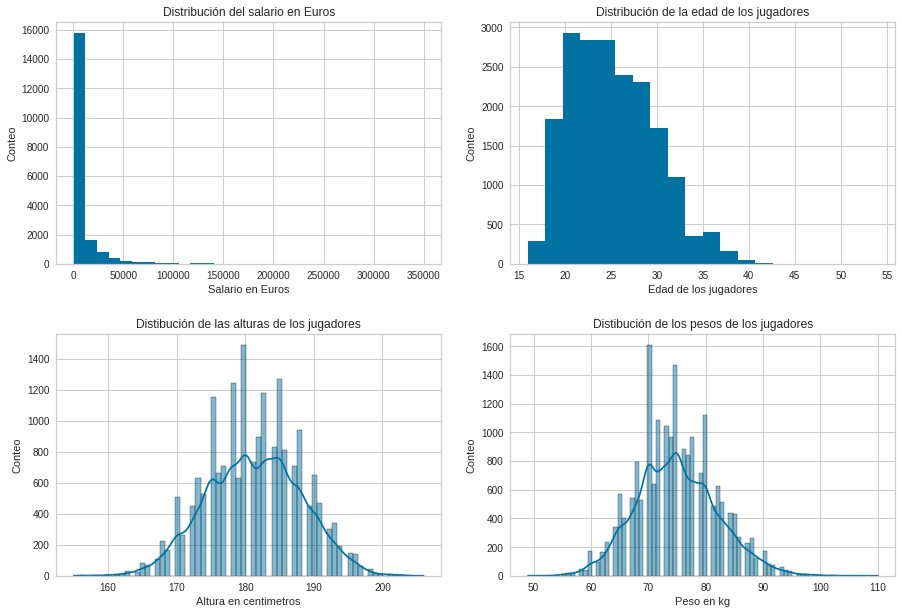

In [ ]:
# Visualización de algunas variables de interés
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0,0].hist(df['wage_eur'], bins=30)
axes[0,0].set_xlabel('Salario en Euros')
axes[0,0].set_ylabel('Conteo')
axes[0,0].set_title('Distribución del salario en Euros')

axes[0,1].hist(df['age'], bins = 20)
axes[0,1].set_xlabel('Edad de los jugadores')
axes[0,1].set_ylabel('Conteo')
axes[0,1].set_title('Distribución de la edad de los jugadores')

axes[1,0].set_title('Distibución de las alturas de los jugadores')
sns.histplot(df, x='height_cm', ax=axes[1,0], kde=True)
axes[1,0].set_xlabel('Altura en centimetros')
axes[1,0].set_ylabel('Conteo')

axes[1,1].set_title('Distibución de los pesos de los jugadores')
sns.histplot(df, x='weight_kg', ax=axes[1,1], kde=True)
axes[1,1].set_xlabel('Peso en kg')
axes[1,1].set_ylabel('Conteo')

plt.tight_layout(pad=2)
plt.show()

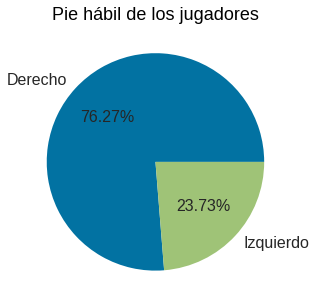

In [ ]:
# Inspeccionamos cuál es el pie hábil de los jugadores
preferred_foot_labels = df["preferred_foot"].value_counts().index # (Derecho, Izquierdo) 
preferred_foot_values = df["preferred_foot"].value_counts().values # (Valores para el derecho, Valores para el izquierdo)
explode = (0, 0.1) # Esto se usa para hacer la separación en el gráfico

# Visualizamos incluyendo porcentajes usando autopct
plt.figure(figsize = (5,5))
plt.pie(preferred_foot_values, labels=['Derecho', 'Izquierdo'], autopct='%1.2f%%', textprops={'fontsize': 16})
plt.title('Pie hábil de los jugadores', color = 'black',fontsize = 18)
plt.show()

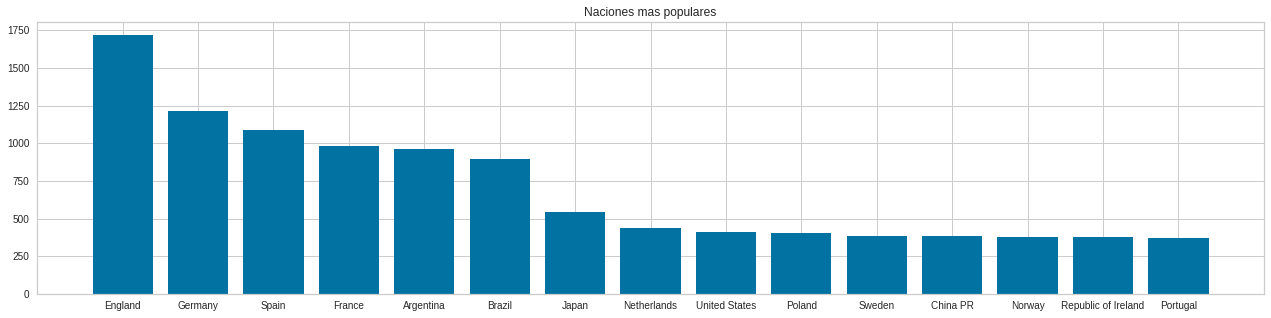

In [ ]:
# Inspeccionamos y visualizamos las nacionalidades más populares
bar_plot = dict(Counter(df['nationality_name'].values).most_common(15))
fig, ax = plt.subplots(figsize = (22,5))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Naciones mas populares')
plt.show()

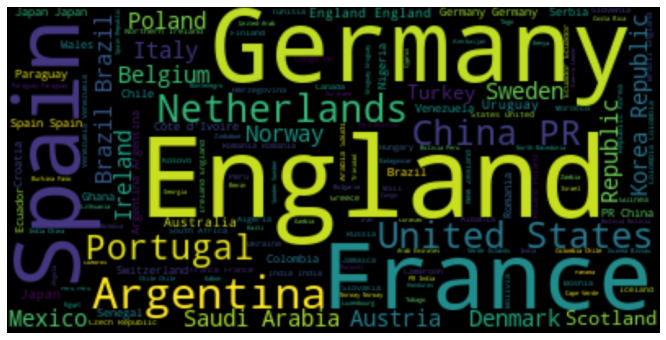

In [ ]:
# Visualización alternativa de naciones más populares
nationality_name = " ".join(n for n in df['nationality_name'])
plt.figure(figsize=(18, 6)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='gaussian') 
plt.axis('off') 
plt.show()

####<font color='green'> Ideas extraídas de: https://www.kaggle.com/code/brightezeoha/fifa-22-data-analysis. 

##<font color='blue'>**2. Preprocesamiento de los datos y análisis exploratorio**

In [ ]:
# Identificamos las columnas numéricas
df_nums = df.select_dtypes('number')

In [ ]:
# Inspeccionamos qué variables tienen datos faltantes para luego no contemplarlas
df_nums.isnull().sum()

sofifa_id                          0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
league_level                      61
club_jersey_number                61
club_contract_valid_until         61
nationality_id                     0
nation_team_id                 18480
nation_jersey_number           18480
weak_foot                          0
skill_moves                        0
international_reputation           0
release_clause_eur              1176
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
a

In [ ]:
# Prescindimos de columnas con datos Nan y aquellas con ids ya que estas últimas no aportan información para clustering
df_nums_proc = df_nums.dropna(axis=1, how='any')
df_nums_proc.drop(columns=['sofifa_id', 'nationality_id'], inplace=True)
df_nums_proc.columns

Index(['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'international_reputation', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
      dtype=

In [ ]:
# En base a la limpieza anterior, definimos las variables relacionadas específicamente con habilidades en el objeto Skills
     
Skills = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
          'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
          'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
          'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
          'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
          'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
          'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
          'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
          'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
          'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
          'goalkeeping_reflexes']

47


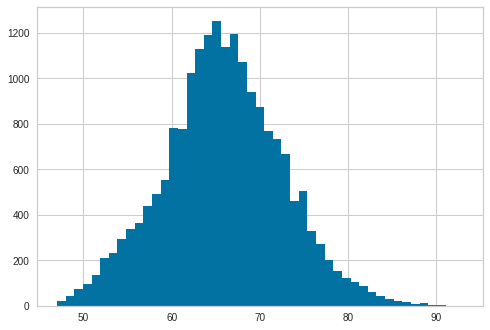

In [ ]:
# Visualizamos la variable Overall que se calcula usando otras variables de habilidad del jugador y que nos brinda una idea global de desempeño
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

In [ ]:
# Para aligerar los procesos y mejorar la interpretación de los datos, solo utilizamos los mejores jugadores basados en el Overall 
df_ov=df[(df_nums['overall']>70)] # Contemplamos solo los mejores jugadores

# Aparte generamos el dataframe de Skills
df_Skills=df_ov[Skills]

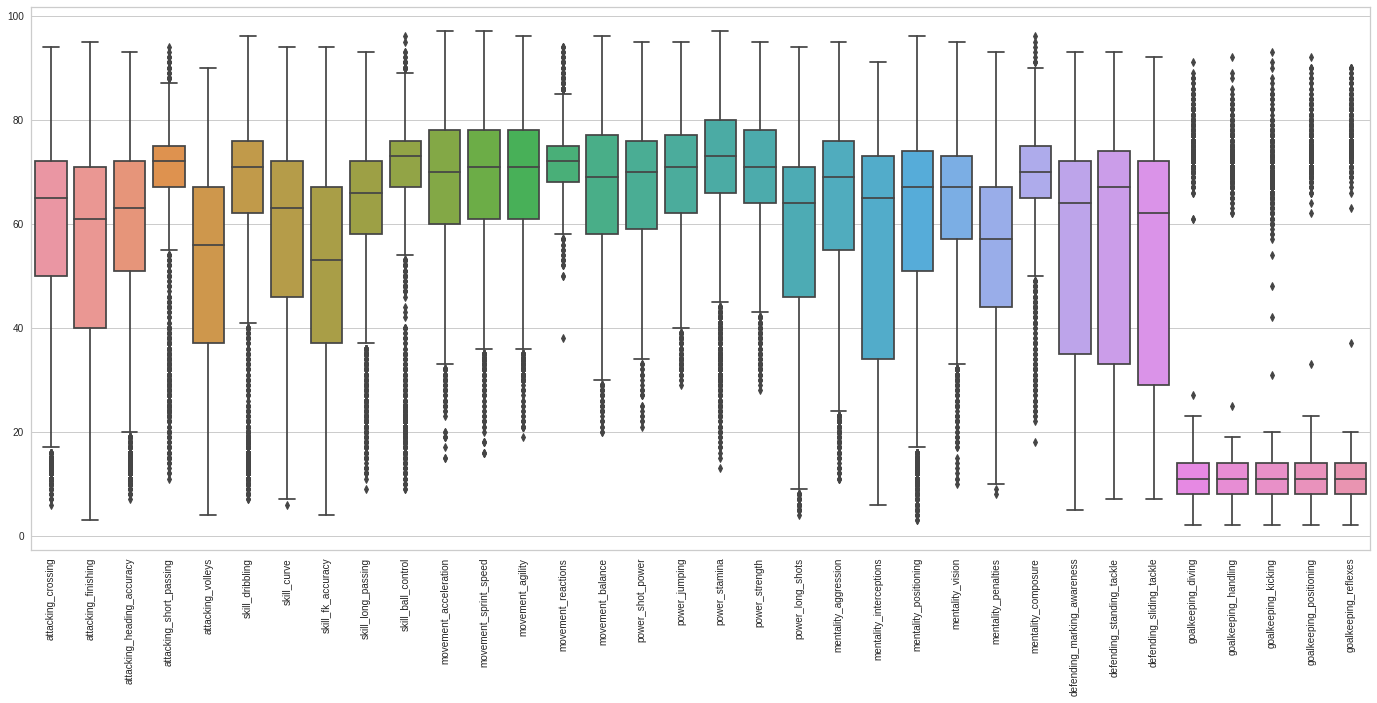

In [ ]:
# Visualizamos la distribución de valores de las skills para verificar si es necesario escalar. 
plt.figure(figsize=(24,10))
ax =sns.boxplot(data=df_Skills)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90); # Este punto y coma (semicolon) sirve para evitar que se impriman las etiquetas de x antes del gráfico

Dado que todas las variables se distribuyen entre valores de 0 a 100, no sería necesario realizar un escalamiento de variables. Sin embargo, una estandarización de los datos, ajustaría mejor la variabilidad de los datos a un mismo rango. En este sentido, nos pareció interesante tomar la referencia de Mohamad y Usman (2013), quienes recomiendan el uso de z-score como método de estandarización para K-means. Fuente: https://maxwellsci.com/print/rjaset/v6-3299-3303.pdf  

In [ ]:
df_Skills = df_Skills.select_dtypes(include='number').apply(stats.zscore)

##<font color='blue'>**3. Aplicación de técnicas de clustering**

El clustering es una técnica que minimiza la distancia entre los objetos de un mismo grupo y maximiza la distancia entre los objetos de distintos grupo o cluster. Para el presente trabajo, analizaremos el uso de dos técnicas de clustering, K-means y DBSCAN.

### 3.1. Clustering con Kmeans


In [ ]:
# Definimos a priori un número de clusters ya que es un hiperparámetro del algoritmo
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_Skills) 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster: Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster: Inertia=  46751.873698879106


**Elección de la cantidad de grupos/clusters**

Para seleccionar la cantidad más adecuada de clusters probamos varias cantidades y usamos el criterio del codo: "elbow method", utilizando Inertia como medida de ajuste.

Text(0.5, 1.0, 'Inertia de k-Means versus número de clusters')

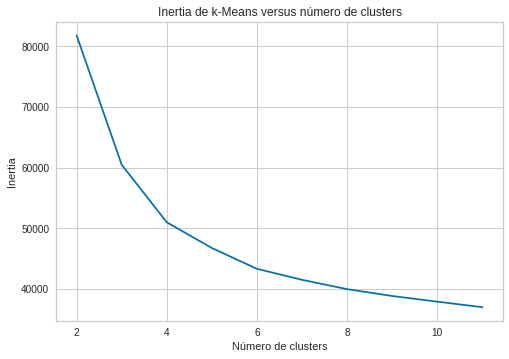

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_Skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Número de clusters')
plt.ylabel("Inertia")
plt.title("Inertia de k-Means versus número de clusters")

Considerando el gráfico resultante, definimos 4 clusters como el agrupamiento mas adecuado

In [ ]:
# Corremos k-means nuevamente pero utilizando la cantidad apropiada de clusters 
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_Skills) 

# Recuperacion de etiquetas
clusters = km.labels_

A continuación graficamos el resultado de agrupar a los jugadores en 4 clases con k-means, considerando solo dos variables

In [ ]:
# Diferenciamos los jugadores de más alto overall para destacarlos en la gráfica
player_crack=df["overall"] > 85

# Elijo dos habilidades
skill_1="movement_acceleration"
skill_2="skill_ball_control"

In [ ]:
kmean_clusters = go.Scatter(x=df_ov[skill_1], y=df_ov[skill_2],
                           mode='markers',
                        text=df_ov.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='plasma',
                                showscale=False))

crack =go.Scatter(x=df_ov.loc[player_crack,skill_1], y=df_ov.loc[player_crack,skill_2],
                      text=df_ov.loc[player_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering con K-means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

####<font color='blue'>A continuación realizamos una evaluación de los clusters obtenidos del K-means

<font color='black'>3.1.1. Cantidad de observaciones por Cluster


In [ ]:
# Calculamos la cantidad de observaciones en cada uno de los 4 clusters
pd.Series(clusters).value_counts()

1    1701
0    1536
2     912
3     444
dtype: int64

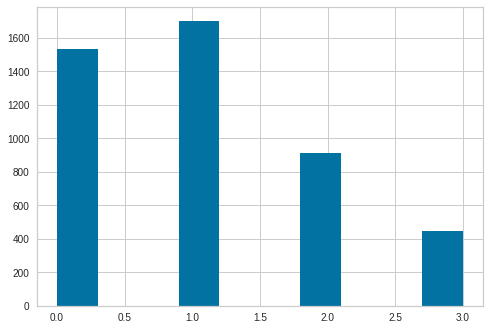

In [ ]:
pd.Series(clusters).hist()

3.1.2. Silohuette. 
El gráfico de silueta muestra una medida de qué tan cerca está cada punto, de los correspondientes a un grupo de puntos, respecto de los puntos de grupos vecinos y, por lo tanto, proporciona una forma de evaluar visualmente parámetros como el número de grupos. Es una medida de cohesión y proporciona información sobre la calidad del agrupamiento, lo cual contribuye a determinar si se debe realizar un refinamiento adicional del agrupamiento actual. Admite valores entre -1 y 1. Si el valor es bajo o negativo, el agrupamiento no es compacto.
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

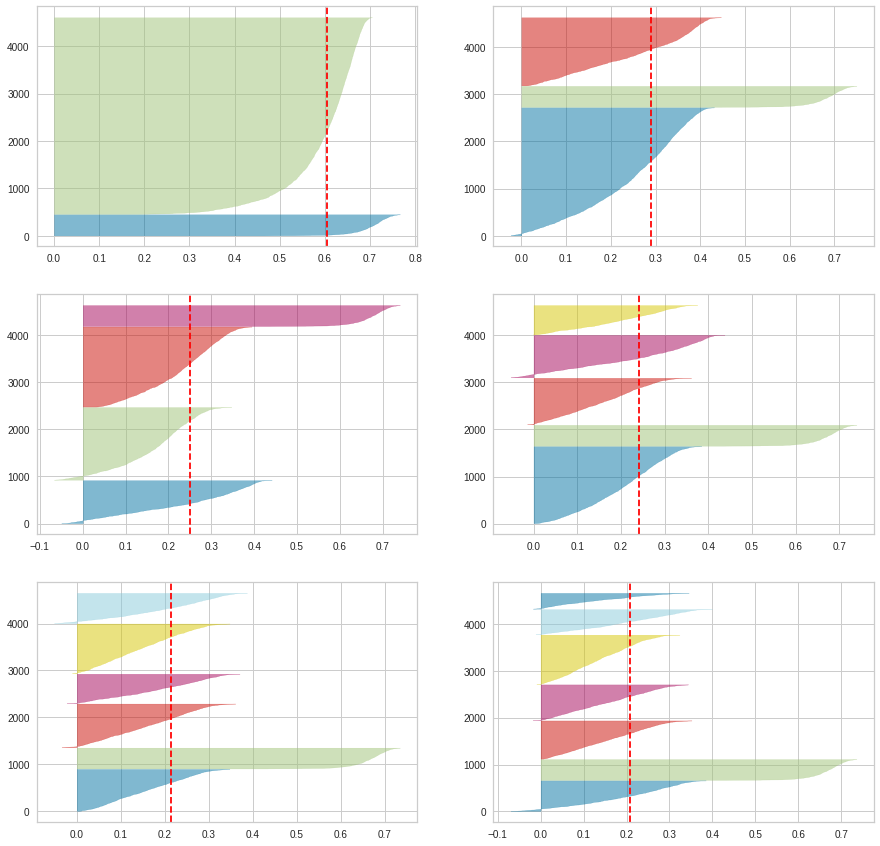

In [ ]:
# Graficamos la puntuación de Silohuette para diferente número de clusters
fig, ax = plt.subplots(3, 2, figsize=(15,15))

for i in range(2, 8):
    km_sil = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km_sil, colors="yellowbrick", ax=ax[q-1][mod])
    visualizer.fit(df_Skills) 

Los gráficos de Silhouette en este caso, no permitieron discriminar claramente cuál es la mejor opción de número de clusters, ya que no hay grupos con puntajes de silueta por debajo del promedio que podrían ser descartados. También podríamos utilizar las fluctuaciones en el tamaño de las grupos de silueta como criterio, pero tampoco parece haber una opción donde se observen tamaños equivalentes entre grupos.  

In [ ]:
# Calculamos el valor promedio de silueta para cada número de clusters
for i in range(2, 8):
    
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(df_Skills)
    score = silhouette_score(df_Skills, km.labels_, metric="euclidean")
    
    print(f"Clusters {i} and Silhouette Score: {score}")

Clusters 2 and Silhouette Score: 0.6055620290927084
Clusters 3 and Silhouette Score: 0.28935143556573284
Clusters 4 and Silhouette Score: 0.2511232809958232
Clusters 5 and Silhouette Score: 0.2420943098277181
Clusters 6 and Silhouette Score: 0.2140904878829671
Clusters 7 and Silhouette Score: 0.2088682544640714


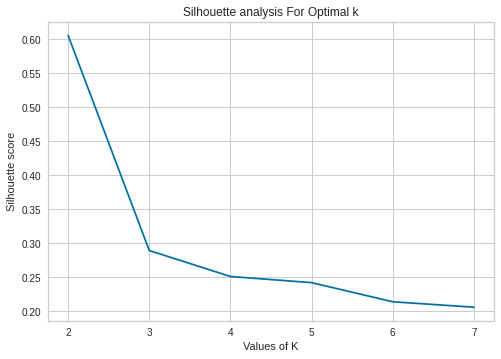

In [ ]:
silhouette_avg = []

for i in range(2, 8):
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_Skills)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(df_Skills, cluster_labels))


plt.plot(range(2, 8), silhouette_avg, "bx-")    
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

El número óptimo de clusters, considerando la curva de valores promedio del score de Silhouette podría validarse en 2. Fuente: https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

El método del codo es una regla de decisión, mientras que Silhouette es una métrica utilizada para la validación durante la agrupación. Por lo tanto, no son alternativas entre sí para encontrar la K óptima. Más bien, son herramientas que se pueden usar juntas para tomar una decisión más segura.

A continuación graficamos el resultado de agrupar a los jugadores en 4 clases con k-means, considerando solo dos variables

In [ ]:
# Diferenciamos los jugadores de m+as alto overall para destacarlos en la gráfica
player_crack = df["overall"] > 85
player_no_crack = df["overall"] < 86

# Elijo dos habilidades
skill_1 = "dribbling"
skill_2 = "skill_ball_control"

In [ ]:
kmean_clusters = go.Scatter(x=df_ov[skill_1], y=df_ov[skill_2],
                           mode="markers",
                           text=df_ov.loc[:,"short_name"],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), 
                                colorscale="plasma",
                                showscale=False))

crack = go.Scatter(x=df_ov.loc[player_crack,skill_1], y=df_ov.loc[player_crack,skill_2],
                      text=df_ov.loc[player_crack,"short_name"],
                      textfont=dict(family="sans serif",size=10,color="black"),
                      opacity=0.9,mode="text")

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering con K-means",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show()

### 3.2. Clustering con DBSCAN

DBSCAN es un acrónimo de Density-based spatial clustering of applications with noise. 

El algoritmo posee dos parámetros: min_samples y eps. min_samples establece los datos mínimos que requeriré para conformar un primer agrupamiento en un entorno de radio eps. Esto define entonces la noción de zona densa y es el criterio fundamental para la determinación de los clusters. En cuanto a su funcionamiento, el algoritmo empieza con una muestra aleatoria y encuentra todos los puntos en el entorno de radio eps. Si el número de puntos es mayor a min_samples se etiqueta ese punto como un punto de núcleo o core, y de esta manera ese punto ya es parte del cluster definido. Si no se cumple la condición antes expuesta, el punto se establece como outlier o ruido. A su vez, todos los puntos del entorno se establecen a priori como puntos no núcleo de cluster. Luego, se realiza el mismo procedimiento para cada uno de ellos, cambiando a punto con su etiqueta y agregando nuevos puntos, o marcando outliers.
Si no hay más puntos en un entorno eps de cada punto del cluster, se salta a otro punto aleatoriamente y se continúa hasta que todo punto es bien un punto de cluster o un outlier. En una segunda fase, el algoritmo revisa todos los puntos outlier que efectivamente se encuentran en la periferia de los clusters para considerarlos parte de estos clusters. 

Fuente: Clases Diplomatura Ap. No Supervisado 2022 y canal formativo de You tube Código Máquina: https://www.youtube.com/watch?v=HMis89lGdkA.

In [ ]:
# Planteo primero la función de ploteo para DBSCAN:
def plot_DBSCAN(X, labels, db, n_clusters):
    
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=(6, 4.8))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14
        )
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6
        )
    plt.title('Número estimado de clusters: %d' % n_clusters)
    plt.show()
    return

DBSCAN requiere parámetros ε y minPts para la agrupación. El parámetro minPts es sencillo de configurar. Los minPts deben ser 4 para conjuntos de datos bidimensionales. Para conjuntos de datos multidimensionales, minPts debe ser 2 * número de dimensiones. Por ejemplo, si el conjunto de datos tiene 6 características, configuro minPts = 12.

https://www.reneshbedre.com/blog/dbscan-python.html

In [ ]:
minPts = 2 * len(df_Skills.columns.to_list())

print(minPts)

68


Para determinar el parámetro ε óptimo, calculamos las distancias del k-vecino más cercano (kNN) (distancia promedio de cada punto de datos a sus k-vecinos más cercanos) de un conjunto de datos de entrada usando el método del k-vecino más cercano (aprendizaje de vecinos más cercanos no supervisados). Para encontrar el vecino más cercano, usamos la función sklearn.neighbors.NearestNeighbors.

La función NearestNeighbors requiere el parámetro n_neighbors (número de vecinos), que puede ser el mismo que el valor minPts.

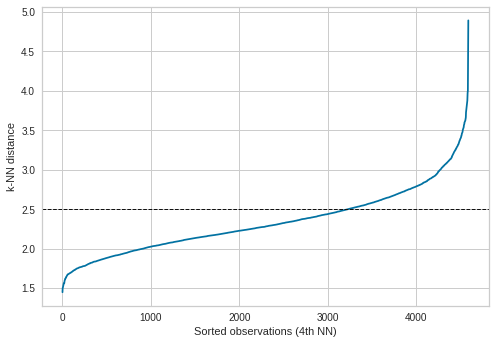

In [ ]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=minPts).fit(df_Skills)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df_Skills)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

# Now, get the sorted kth column (distances with kth neighbors) and plot the kNN distance plot,
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [ ]:
clusters = DBSCAN(eps=2.5, min_samples=minPts).fit(df_Skills)

labels = clusters.labels_

# check unique clusters
set(labels)

{-1, 0, 1}

In [ ]:
# Número de clústeres que encontró el algoritmo
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# Ignorar ruido
n_noise_ = list(labels).count(-1)

print('Número estimado de clusters: %d' % num_clusters)
print('Número estimado de puntos outlier: %d' % n_noise_)
print("Coeficiente Silhouette: %0.3f" % metrics.silhouette_score(df_Skills, labels))

Número estimado de clusters: 2
Número estimado de puntos outlier: 1938
Coeficiente Silhouette: 0.100


In [ ]:
df_ov_dbscan = df_ov.copy()
df_ov_dbscan["cluster"] = pd.Series(labels, index=df_Skills.index)

In [ ]:
df_ov_dbscan.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,cluster
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,-1
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,-1
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,-1
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5

In [ ]:
# Definimos una función para la categoría dribbling ya que la identificamos como una variable importante cuando se realiza el agrupamiento
def cat_dribbling(dribbling):
    
    if dribbling < 52:
        
        cat = "muy_malo"
        
    elif dribbling >= 52 and dribbling < 62:
        
        cat = "malo"
        
    elif dribbling >= 62 and dribbling < 72:
        
        cat = "normal"
        
    elif dribbling >= 72 and dribbling < 82:
        
        cat = "bueno"    
    
    elif dribbling >= 82:
        
        cat = "muy_bueno"
    
    else:
        
        cat = "se_desconoce"
        
    return cat

In [ ]:
grupo_0_db = df_ov_dbscan[df_ov_dbscan["cluster"] == 0]

grupo_0_db["driblador"] = grupo_0_db.apply(lambda x: cat_dribbling(float(x["dribbling"])), axis=1)

group_by_df_0_db = grupo_0_db.groupby(["driblador"]).size().reset_index(name="count_players")

sort_group_by_df_0_db = group_by_df_0_db.sort_values(by=["driblador"], ascending=False)

sort_group_by_df_0_db = sort_group_by_df_0_db.reset_index(drop=True)

sort_group_by_df_0_db 

,driblador,count_players
0,normal,826
1,muy_malo,5
2,muy_bueno,113
3,malo,79
4,bueno,1494


In [ ]:
grupo_atip_db = df_ov_dbscan[df_ov_dbscan["cluster"] == -1]

grupo_atip_db["driblador"] = grupo_atip_db.apply(lambda x: cat_dribbling(float(x["dribbling"])), axis=1)

group_by_df_atip_db = grupo_atip_db.groupby(["driblador"]).size().reset_index(name="count_players")

sort_group_by_df_atip_db = group_by_df_atip_db.sort_values(by=["driblador"], ascending=False)

sort_group_by_df_atip_db = sort_group_by_df_atip_db.reset_index(drop=True)

sort_group_by_df_atip_db 

,driblador,count_players
0,se_desconoce,306
1,normal,506
2,muy_malo,112
3,muy_bueno,140
4,malo,320
5,bueno,554


In [ ]:
grupo_1_db = df_ov_dbscan[df_ov_dbscan["cluster"] == 1]

grupo_1_db["driblador"] = grupo_1_db.apply(lambda x: cat_dribbling(float(x["dribbling"])), axis=1)

group_by_df_1_db = grupo_1_db.groupby(["driblador"]).size().reset_index(name="count_players")

sort_group_by_df_1_db = group_by_df_1_db.sort_values(by=["driblador"], ascending=False)

sort_group_by_df_1_db = sort_group_by_df_1_db.reset_index(drop=True)

sort_group_by_df_1_db 

,driblador,count_players
0,se_desconoce,138


Conclusión sobre las técnicas de clustering:

Utilizando la normalización ZScore tanto para aplicar el algoritmo de KMeans y como el de DBSCAN, se concluye que, para el presente dataset, teniendo en cuenta la variable dribbling, que generalmente es la habilidad que más admiran los espectadores y la que ayuda a ganar partidos, el algoritmo de Kmeans agrupa mejor que el DBSCAN. Esto, debido a que en el método de kmeans se separaron mejor a los jugadores por su habilidad para dribblar.

##<font color='blue'>**4. Embedding con PCA**

**Embeddings** 

Los embeddings permiten crear nuevas variables caracterizadoras/predictoras de los datos en lugar de tener que elegir un subconjunto de las presentes en el dataset. Los embeddings no tienen en cuenta etiquetas de clase y su principal característica es que proyectan a menos dimensiones preservando la mayor cantidad de información posible; minimizando el error cuadrado de reconstruir los datos originales.
Son útiles para reducir la dimensionalidad del dataset, reducen el overfitting, reducen el tiempo en ingeniería de características, reducen el sesgo del analista y permiten la visualización del problema. En contraparte, se pierde parte de la información e interpretabilidad de los datos.

Para el presenta trabajo, seleccionamos el embedding PCA (Análisis de componentes principales) para utilizar en el análisis de los datos. 

La idea es comparar el desempeño de los jugadores argentinos en relación al resto de los jugadores del mundo.

In [ ]:
# Definimos el conjunto de datos con los mismos criterios previos, pero además le quitamos los arqueros
df_acp = df[(df["player_positions"]!='GK')]
df_acp = df_acp[(df_acp['overall']>70)]
df_acp_Skills = df_acp[Skills]
df_acp_Skills.shape

(4149, 34)

In [ ]:
# Descomposición de PCA
pca=decomposition.PCA(n_components=2) #elegimos 2 pero podrían ser más 

pca.fit(df_acp_Skills)

# Cálculo de la proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# Cálculo de la proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

df_acp_Skills_projected=pca.transform(df_acp_Skills) 
print ('Shape de los datos: ', df_acp_Skills_projected.shape)

proporción de varianza por componente:  [0.47689458 0.17866578]
proporción de varianza por componente acumulada:  [0.47689458 0.65556036]
Shape de los datos:  (4149, 2)


In [ ]:
#Visualizamos la posición relativa de las skills en relación a los dos componentes principales con mayor varianza explicada
data=[]
pcs=pca.components_
for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=df_acp_Skills.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [ ]:
# Comparamos los jugadores argentinos con el resto de los jugadores

Argentinos= df_acp["nationality_name"]=='Argentina'
Resto_del_mundo = df_acp["nationality_name"]!='Argentina'

palette=['navy','red','#A2D5F2','orange','green','pink','grey']  
data=[]

acp_Arg =go.Scatter(x=df_acp_Skills_projected[Argentinos,0], y=df_acp_Skills_projected[Argentinos,1],name='Argentina',
                      text=df_acp.loc[Argentinos,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=1,marker=dict(color=palette[1],size=8),mode='markers+text')

acp_Rest =go.Scatter(x=df_acp_Skills_projected[Resto_del_mundo,0], y=df_acp_Skills_projected[Resto_del_mundo,1],name='Resto del mundo',
                      opacity=0.5,marker=dict(color='green',size=3),mode='markers')

data=[acp_Arg,acp_Rest]

layout = go.Layout(title="ACP - {} vs {}".format('Argentina','Resto del mundo'),titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=750)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

**Conclusión:** El gráfico previo muestras que los jugadores argentinos en su conjunto no muestran especificidad en sus habilidades, sino que tienen representación en toda la distribución de estas habilidades (skills) encontradas en el dataset.